In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from TicTacToe.human import Human as human
from TicTacToe.duel import duel, play_n_duels

# Value iteration

## Value iteration player vs random player

In [2]:
from TicTacToe.agent_value_iteration import create_avi
from TicTacToe.agent_random import Random as random_agent

In [3]:
agent1 = create_avi()
agent2 = random_agent()

In [4]:
playerX = agent2
playerO = agent1
playerO.set_role('O')

In [5]:
prob = play_n_duels(3000, playerX, playerO)

In [6]:
agent1.wins

2577

Text(0, 0.5, 'Porcentaje de juegos ganados')

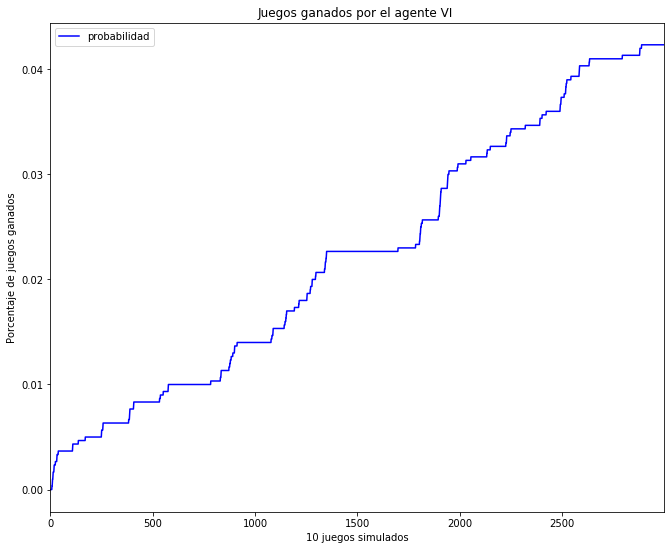

In [7]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente VI ',color='b')
plt.xlabel("juegos simulados")
plt.ylabel("Porcentaje de juegos ganados")

# Monte Carlo  

## Monte Carlo player vs random player

In [8]:
from TicTacToe.agent_mc import create_amc

In [9]:
agent4 = create_amc()

In [10]:
playerX = agent2
playerO = agent4
playerX.set_role('X')
playerO.set_role('O')

In [11]:
prob = play_n_duels(3000, playerX, playerO)

Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Ale

Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Ale

In [12]:
vals = [(k,v) for k, v in agent4.values.items() if v != 0]

In [13]:
len(vals)

453

In [14]:
agent4.wins

1927

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

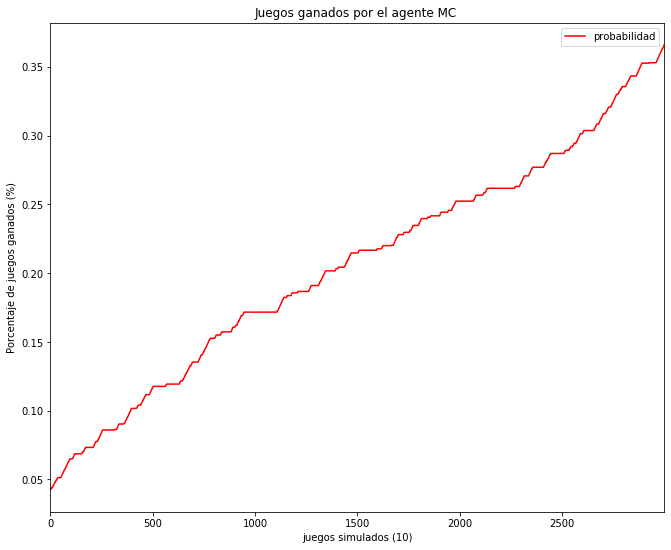

In [15]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente MC ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

# Q-Learning

## Q-Learning player vs random player

In [16]:
from TicTacToe.agent_tabular_qlearning import create_atql 

In [17]:
agent5 = create_atql()

In [18]:
playerX = agent2
playerO = agent5
playerX.set_role('X')
playerO.set_role('O')

In [19]:
prob = play_n_duels(3000, playerX, playerO)

Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Ale

Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Ale

Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!
Accion Aleatoria!


In [20]:
vals = [(k,v) for k, v in agent5.values.items() if v != 0]

In [21]:
len(vals)

900

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

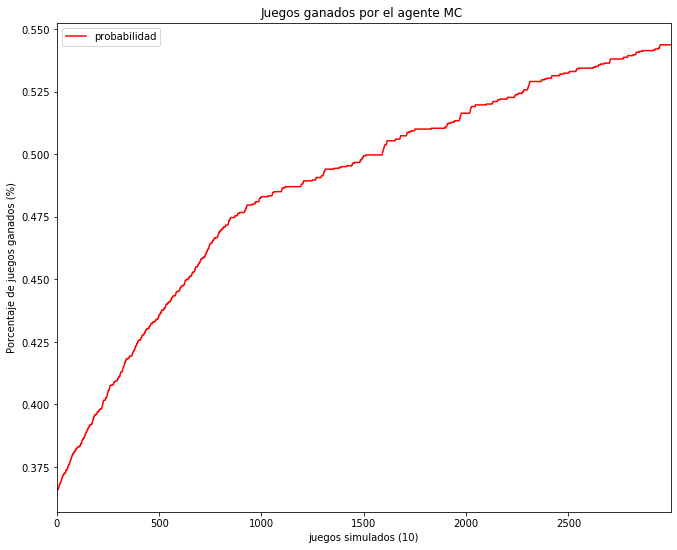

In [22]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente Q ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")